In [893]:
#Project3_SpotifyClassification_250429.ipnyb

In [894]:
#M. Lacorte, 4/29/2025;
#Much of given code is provided by Prof. Imran Khan;
#modification of this code is kept at a minimum;
#code below is then APPLIED to specific
#binary and multiclass classification examples
#for "track_genre"

In [895]:
#Purpose:
#   (1) Given a dataset of songs and their genres and quantified
#       musical characteristics, run a "classifcation" program
#       to predict their genre from these quantified characteristics.
#   (2) This is done for two specific "track_genre's" (binary experiment)
#       and three specific ("track_genre's") (multiclass experiment).
#   (3) Each experiment is run first with all quantified characteristics.
#       Then, carefully removing quantified characteristics ("features"),
#       the code is run for one less and two less of these features.
#   (4) Each run is analyzed, COMPARING THE ACCURACY OF THE CLASSIFICATION
#       METHODS SVP, KNN, and Random Forest.


In [896]:
#Code Structure:
# (1) This code reads the file "dataset.csv" which contains genres and
#     quantified characteristics of >100,000 songs on Spotify.
# (2) The code is RECOPIED for EACH PART of
#     EACH CLASSIFICATION EXPERIMENT.
# (3) The charts and Conclusions are wrapped up at the END of
#     EACH CLASSIFICATION EXPERIMENT.

# Spotify Genre Classification

This project will guide you through the process of building a music genre classifier. You’ll start by selecting specific genres to work with, then examine correlations among different musical features. Using these correlations, you'll identify any redundant features that could be removed to improve model performance and simplify the dataset.

After preparing your data, you’ll train and evaluate three different classification models: Support Vector Machine (SVM), K-Nearest Neighbors (KNN), and Random Forest. By the end of this project, you’ll compare these models to see which performs best in classifying music genres.

Let’s get started and see how well machine learning can predict the genre of a song based on its characteristics!

## Import Libraries

In [897]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

## Load and Explore Dataset
It’s essential to load and explore your dataset to understand its structure, identify any missing or inconsistent values, and get a sense of the types of features available. This initial exploration helps you make informed decisions about data cleaning, feature selection, and preprocessing steps.

In [898]:
# Load the dataset
df = pd.read_csv('dataset.csv')

# Display initial dataset information
print("First 5 rows of the dataset:")
print(df.head(5))
print("\nInitial Data Overview:")
print(df.info())
print("\nStatistical Summary:")
print(df.describe())

First 5 rows of the dataset:
   Unnamed: 0                track_id                 artists  \
0           0  5SuOikwiRyPMVoIQDJUgSV             Gen Hoshino   
1           1  4qPNDBW1i3p13qLCt0Ki3A            Ben Woodward   
2           2  1iJBSr7s7jYXzM8EGcbK5b  Ingrid Michaelson;ZAYN   
3           3  6lfxq3CG4xtTiEg7opyCyx            Kina Grannis   
4           4  5vjLSffimiIP26QG5WcN2K        Chord Overstreet   

                                          album_name  \
0                                             Comedy   
1                                   Ghost (Acoustic)   
2                                     To Begin Again   
3  Crazy Rich Asians (Original Motion Picture Sou...   
4                                            Hold On   

                   track_name  popularity  duration_ms  explicit  \
0                      Comedy          73       230666     False   
1            Ghost - Acoustic          55       149610     False   
2              To Begin Again          

## Select Genres

For this project, you’ll conduct three classification experiments. One experiment should be binary (classifying between two genres), while the other two will be multiclass (classifying among multiple genres).

Choose Your Genres
Below are some genre options available in the dataset:

`['rock', 'rap', 'jazz', 'latin', 'country', 'pop', 'classical', 'electronic', 'acoustic', 'r-and-b']`

Feel free to explore the dataset if you'd like to use other genres, this dataset has over 100 genres available!

#Instructions
**Binary Experiment:** Choose two genres that you want to classify between (e.g., Rock vs. Jazz). This experiment will help you understand classification when only two classes are present.

**Multiclass Experiments:** For the other two experiments, choose three or more genres to create multiclass classification problems (e.g., Rock, Pop, and Classical). These experiments will show how classification models perform with more categories.



## I.  BINARY EXPERIMENT

In [899]:
# I.A.  BINARY EXPERIMENT, PART 1:  Two Genres and No Removed Features

In [900]:
# Note:  How to select two genres for "selected_genres" list:
#        Repeatly, randomly choose two genres out of the 100+ in
#        "track_genre."  Then run the
#               sns.heatmap(corr_matrix)
#        command to create the Correlation Matrix of features
#        and run the SVP, KNN, and Random Forest Methods to find
#        method accuracies.
#
#        Ultimately, choose the genre pair whose method accuracies are
#        highest and Correlation Matrix has many feature intersections
#        with |R|>0.7 and yet (ideally) their features have low |R|
#        individually with "track_genre."

In [901]:
# Example: selected_genres = ['rock', 'rap', 'jazz', 'latin', 'country', 'pop']
selected_genres = ['piano', 'death-metal']  # <- Enter your genres here

# Filter for the selected genres
df = df[df['track_genre'].isin(selected_genres)]

# Limit the dataset to a sample of 100 tracks per selected genre
df = df.groupby('track_genre').apply(lambda x: x.sample(100, random_state=42)).reset_index(drop=True)

<ipython-input-901-4385ea5d350c>:8: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df = df.groupby('track_genre').apply(lambda x: x.sample(100, random_state=42)).reset_index(drop=True)


## Data Cleaning and Preparation

Preparing data for machine learning involves selecting relevant columns, handling missing values, and encoding categorical variables. First, selecting only the most relevant columns focuses the dataset on essential features, simplifying the model and often improving performance. Next, handling missing values is crucial because incomplete data can disrupt model training; we address this by either removing rows with missing entries or filling them in with appropriate values, such as the mean or median. Finally, encoding categorical variables (like genre) into numerical format allows machine learning algorithms to process non-numeric data. By assigning a unique number to each category using label encoding, we enable the model to interpret these variables accurately, making our dataset ready for analysis.


In [902]:
# Select relevant columns
df = df[['danceability', 'energy', 'loudness', 'speechiness', 'acousticness',
         'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms', 'explicit', 'track_genre']]

# Drop any rows with missing values
df.dropna(inplace=True)

# Convert 'track_genre' to numerical values (Label Encoding)
label_encoder = LabelEncoder()
df['track_genre'] = label_encoder.fit_transform(df['track_genre'])

# Convert 'explicit' to binary 1/0
df['explicit'] = df['explicit'].astype(int)

# Show class distribution for genres after filtering and sampling
print("\nSampled Genre Distribution:")
print(df['track_genre'].value_counts())


Sampled Genre Distribution:
track_genre
0    100
1    100
Name: count, dtype: int64


## Correlation Analysis

The heatmap above shows correlations between features in the dataset. High correlation values (close to 1 or -1) indicate features that likely carry similar information. Removing one of these correlated features can reduce the dataset’s dimensionality, making the model simpler and potentially improving performance.



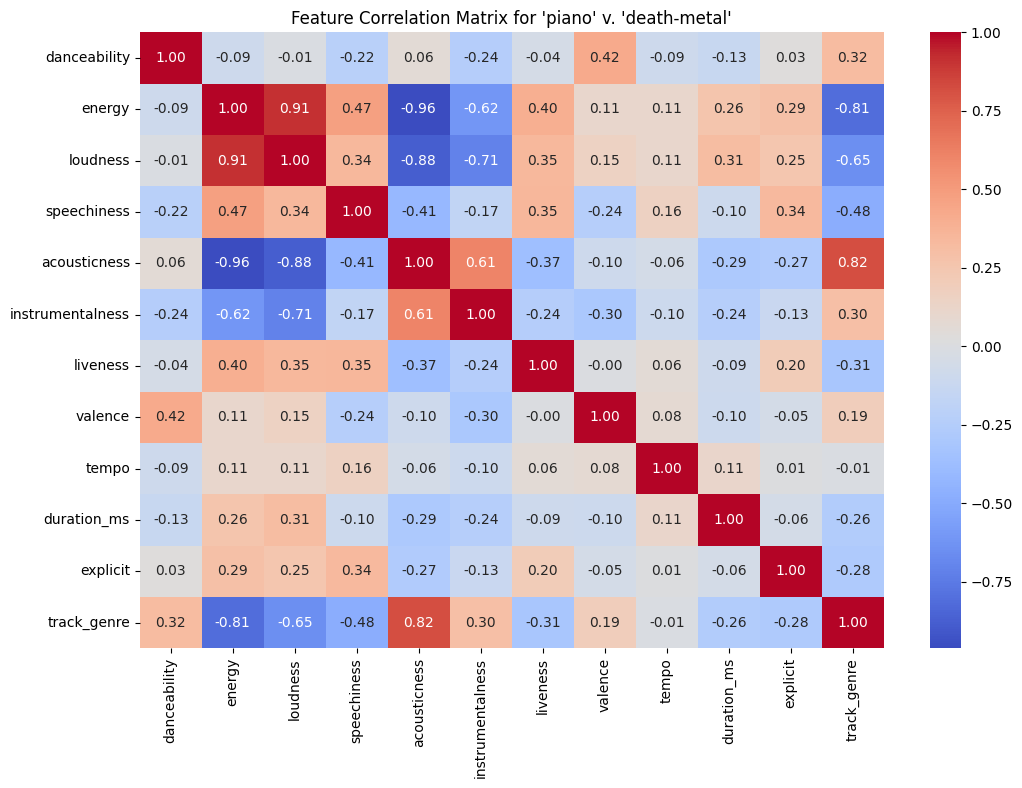

In [903]:

# Heatmap Correlation Matrix
plt.figure(figsize=(12, 8))
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Matrix for 'piano' v. 'death-metal'")
plt.show()



## Feature Selection Experiments
**Experiment 1: Train with all features**
Train your models (SVM, KNN, and Random Forest) using all features to establish a baseline. You can do this by running the rest of the notebook without making any changes.

**Experiment 2: Remove one highly correlated feature**
Identify a pair of features with a correlation around |0.7| or higher, then remove one and re-train your models. Note any differences compared to the baseline.

**Experiment 3: Remove multiple correlated features**
Remove multiple features with correlations around |0.7| or higher. Re-train your models and compare these results with both the baseline and Experiment 2.

These experiments will help you understand the impact of correlated features on model performance.

In [904]:
# This is still BINARY EXPERIMENT, PART 1, so NO features are removed below

In [905]:
# Example: remove_features = ['danceability', 'liveness', 'speechiness', 'instrumentalness', 'duration_ms']
remove_features = []  # <- Enter  features to remove here

# Drop the selected features
df.drop(columns=remove_features, inplace=True)

## Prepare Data for Modeling

Split the data into training and testing sets and standardize the features.

In [906]:
# Feature and target selection
X = df.drop(columns=['track_genre'])
y = df['track_genre']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Model Training and Evaluation

Train and evaluate three models: Support Vector Machine (SVM), K-Nearest Neighbors (KNN), and Random Forest. Compare their accuracies to find the best-performing model.

In [907]:
# 1. Support Vector Machine (SVM)
print("\nSupport Vector Machine (SVM) Results:")
svm = SVC()
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)
print("SVM Accuracy:", accuracy_score(y_test, y_pred_svm))
print("Classification Report:\n", classification_report(y_test, y_pred_svm))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_svm))


Support Vector Machine (SVM) Results:
SVM Accuracy: 0.9833333333333333
Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.98        31
           1       1.00      0.97      0.98        29

    accuracy                           0.98        60
   macro avg       0.98      0.98      0.98        60
weighted avg       0.98      0.98      0.98        60

Confusion Matrix:
 [[31  0]
 [ 1 28]]


In [908]:
# 2. K-Nearest Neighbors (KNN)
print("\nK-Nearest Neighbors (KNN) Results:")
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)
print("KNN Accuracy:", accuracy_score(y_test, y_pred_knn))
print("Classification Report:\n", classification_report(y_test, y_pred_knn))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_knn))


K-Nearest Neighbors (KNN) Results:
KNN Accuracy: 0.9833333333333333
Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.98        31
           1       1.00      0.97      0.98        29

    accuracy                           0.98        60
   macro avg       0.98      0.98      0.98        60
weighted avg       0.98      0.98      0.98        60

Confusion Matrix:
 [[31  0]
 [ 1 28]]


In [909]:
# 3. Random Forest
print("\nRandom Forest Results:")
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Classification Report:\n", classification_report(y_test, y_pred_rf))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))


Random Forest Results:
Random Forest Accuracy: 0.9666666666666667
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.94      0.97        31
           1       0.94      1.00      0.97        29

    accuracy                           0.97        60
   macro avg       0.97      0.97      0.97        60
weighted avg       0.97      0.97      0.97        60

Confusion Matrix:
 [[29  2]
 [ 0 29]]


## Model Comparison

Compare model accuracies to determine the best model for genre classification.

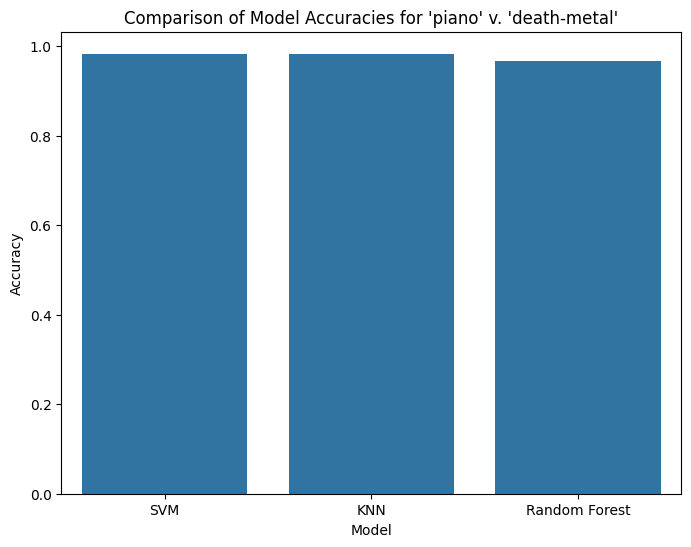

In [910]:
# Comparison of Model Accuracies
model_names = ['SVM', 'KNN', 'Random Forest']
accuracies = [accuracy_score(y_test, y_pred_svm), accuracy_score(y_test, y_pred_knn), accuracy_score(y_test, y_pred_rf)]

plt.figure(figsize=(8, 6))
sns.barplot(x=model_names, y=accuracies)
plt.xlabel("Model")
plt.ylabel("Accuracy")
plt.title("Comparison of Model Accuracies for 'piano' v. 'death-metal'")
plt.show()

In [911]:
#Observations of BINARY EXPERIMENT, PART 1:  Two Genres and No Removed Features:
#SVM Accuracy:  0.98333; KNN Accuracy: 0.98333; Random Forest Accuracy: 0.96667


In [912]:
# I.B.  BINARY EXPERIMENT, PART 2:  Two Genres and One Removed Feature

In [913]:
# Now remove one feature:

In [914]:
# Note:  Choose a "feature" whose Correlation Matrix has
#        many feature intersections with |R|>0.7 and yet its
#        feature has the LOWEST |R| with "track_genre."

In [915]:
# Example: remove_features = ['danceability', 'liveness', 'speechiness', 'instrumentalness', 'duration_ms']
remove_features = ['instrumentalness']  # <- Enter  features to remove here

# Drop the selected features
df.drop(columns=remove_features, inplace=True)

## Prepare Data for Modeling

Split the data into training and testing sets and standardize the features.

In [916]:
# Feature and target selection
X = df.drop(columns=['track_genre'])
y = df['track_genre']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Model Training and Evaluation

Train and evaluate three models: Support Vector Machine (SVM), K-Nearest Neighbors (KNN), and Random Forest. Compare their accuracies to find the best-performing model.

In [917]:
# 1. Support Vector Machine (SVM)
print("\nSupport Vector Machine (SVM) Results:")
svm = SVC()
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)
print("SVM Accuracy:", accuracy_score(y_test, y_pred_svm))
print("Classification Report:\n", classification_report(y_test, y_pred_svm))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_svm))


Support Vector Machine (SVM) Results:
SVM Accuracy: 0.9666666666666667
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.97      0.97        31
           1       0.97      0.97      0.97        29

    accuracy                           0.97        60
   macro avg       0.97      0.97      0.97        60
weighted avg       0.97      0.97      0.97        60

Confusion Matrix:
 [[30  1]
 [ 1 28]]


In [918]:
# 2. K-Nearest Neighbors (KNN)
print("\nK-Nearest Neighbors (KNN) Results:")
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)
print("KNN Accuracy:", accuracy_score(y_test, y_pred_knn))
print("Classification Report:\n", classification_report(y_test, y_pred_knn))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_knn))


K-Nearest Neighbors (KNN) Results:
KNN Accuracy: 0.9833333333333333
Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.98        31
           1       1.00      0.97      0.98        29

    accuracy                           0.98        60
   macro avg       0.98      0.98      0.98        60
weighted avg       0.98      0.98      0.98        60

Confusion Matrix:
 [[31  0]
 [ 1 28]]


In [919]:
# 3. Random Forest
print("\nRandom Forest Results:")
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Classification Report:\n", classification_report(y_test, y_pred_rf))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))


Random Forest Results:
Random Forest Accuracy: 0.9666666666666667
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.94      0.97        31
           1       0.94      1.00      0.97        29

    accuracy                           0.97        60
   macro avg       0.97      0.97      0.97        60
weighted avg       0.97      0.97      0.97        60

Confusion Matrix:
 [[29  2]
 [ 0 29]]


## Model Comparison

Compare model accuracies to determine the best model for genre classification.

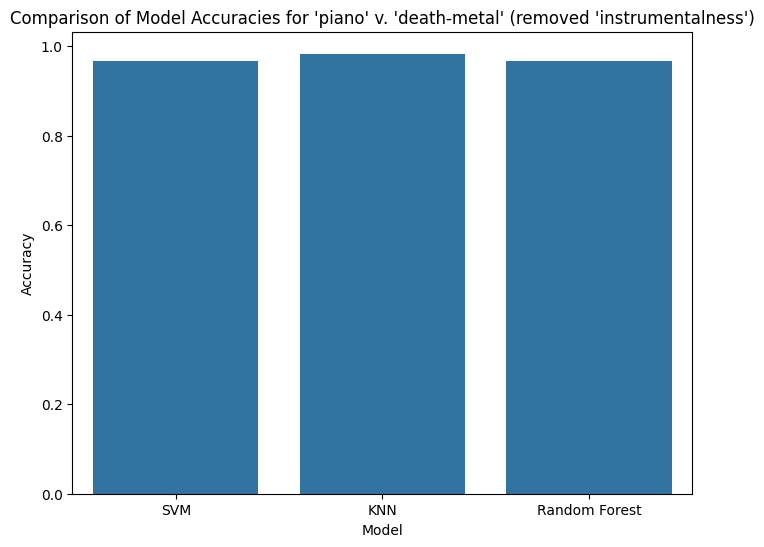

In [920]:
# Comparison of Model Accuracies
model_names = ['SVM', 'KNN', 'Random Forest']
accuracies = [accuracy_score(y_test, y_pred_svm), accuracy_score(y_test, y_pred_knn), accuracy_score(y_test, y_pred_rf)]

plt.figure(figsize=(8, 6))
sns.barplot(x=model_names, y=accuracies)
plt.xlabel("Model")
plt.ylabel("Accuracy")
plt.title("Comparison of Model Accuracies for 'piano' v. 'death-metal' (removed 'instrumentalness')")
plt.show()

In [921]:
#Observations of BINARY EXPERIMENT, PART 2:  Two Genres and One Removed Feature:
#SVM Accuracy:  0.96667; KNN Accuracy: 0.98333; Random Forest Accuracy: 0.96667

In [922]:
# I.C.  BINARY EXPERIMENT, PART 3:  Two Genres and Two Removed Features

In [923]:
# Now remove two features, including the feature removed in Part 2:

In [924]:
# Note:  Choose two "features" whose Correlation Matrix have
#        many feature intersections with |R|>0.7 and yet (ideally) their
#        features have the TWO LOWEST |R| individually with "track_genre."

In [925]:
# Example: remove_features = ['danceability', 'liveness', 'speechiness', 'instrumentalness', 'duration_ms']
#remove_features = ['instrumentalness', 'loudness']  # <- Enter  features to remove here
remove_features = ['loudness']  # <- # 'instrumentalness' has already been removed in Part 2

# Drop the selected features
df.drop(columns=remove_features, inplace=True)

## Prepare Data for Modeling

Split the data into training and testing sets and standardize the features.

In [926]:
# Feature and target selection
X = df.drop(columns=['track_genre'])
y = df['track_genre']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Model Training and Evaluation

Train and evaluate three models: Support Vector Machine (SVM), K-Nearest Neighbors (KNN), and Random Forest. Compare their accuracies to find the best-performing model.

In [927]:
# 1. Support Vector Machine (SVM)
print("\nSupport Vector Machine (SVM) Results:")
svm = SVC()
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)
print("SVM Accuracy:", accuracy_score(y_test, y_pred_svm))
print("Classification Report:\n", classification_report(y_test, y_pred_svm))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_svm))


Support Vector Machine (SVM) Results:
SVM Accuracy: 0.9666666666666667
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.97      0.97        31
           1       0.97      0.97      0.97        29

    accuracy                           0.97        60
   macro avg       0.97      0.97      0.97        60
weighted avg       0.97      0.97      0.97        60

Confusion Matrix:
 [[30  1]
 [ 1 28]]


In [928]:
# 2. K-Nearest Neighbors (KNN)
print("\nK-Nearest Neighbors (KNN) Results:")
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)
print("KNN Accuracy:", accuracy_score(y_test, y_pred_knn))
print("Classification Report:\n", classification_report(y_test, y_pred_knn))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_knn))


K-Nearest Neighbors (KNN) Results:
KNN Accuracy: 0.9833333333333333
Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.98        31
           1       1.00      0.97      0.98        29

    accuracy                           0.98        60
   macro avg       0.98      0.98      0.98        60
weighted avg       0.98      0.98      0.98        60

Confusion Matrix:
 [[31  0]
 [ 1 28]]


In [929]:
# 3. Random Forest
print("\nRandom Forest Results:")
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Classification Report:\n", classification_report(y_test, y_pred_rf))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))


Random Forest Results:
Random Forest Accuracy: 0.9666666666666667
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.94      0.97        31
           1       0.94      1.00      0.97        29

    accuracy                           0.97        60
   macro avg       0.97      0.97      0.97        60
weighted avg       0.97      0.97      0.97        60

Confusion Matrix:
 [[29  2]
 [ 0 29]]


## Model Comparison

Compare model accuracies to determine the best model for genre classification.

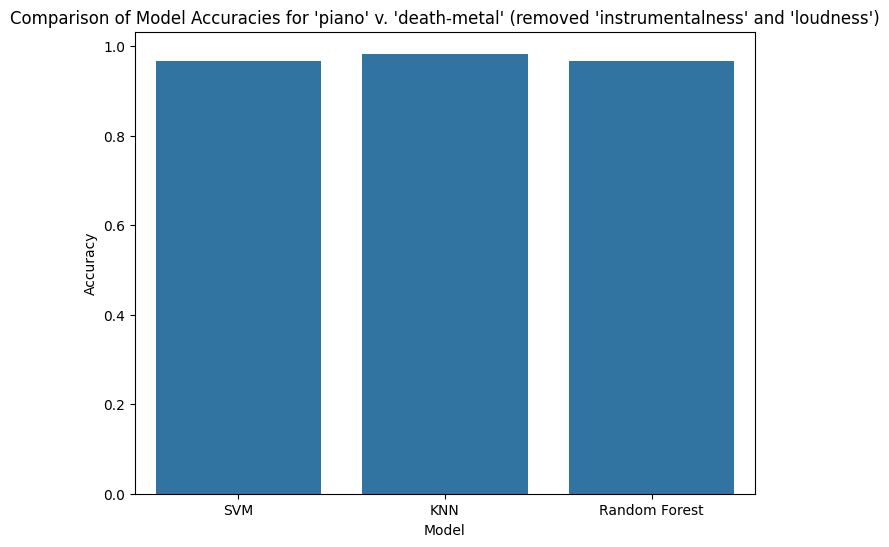

In [930]:
# Comparison of Model Accuracies
model_names = ['SVM', 'KNN', 'Random Forest']
accuracies = [accuracy_score(y_test, y_pred_svm), accuracy_score(y_test, y_pred_knn), accuracy_score(y_test, y_pred_rf)]

plt.figure(figsize=(8, 6))
sns.barplot(x=model_names, y=accuracies)
plt.xlabel("Model")
plt.ylabel("Accuracy")
plt.title("Comparison of Model Accuracies for 'piano' v. 'death-metal' (removed 'instrumentalness' and 'loudness')")
plt.show()

In [931]:
#Observations of BINARY EXPERIMENT, PART 3:  Two Genres and Two Removed Features:
#SVM Accuracy:  0.96667; KNN Accuracy: 0.98333; Random Forest Accuracy: 0.96667

In [932]:
# I.D.  BINARY EXPERIMENT, PART 4:  Two Genres and Three Removed Features

In [933]:
# Now remove three features, including the features removed in Parts 2 and 3:

In [934]:
# Note:  Choose three "features" whose Correlation Matrix have
#        many feature intersections with |R|>0.7 and yet (ideally) their
#        features have the THREE LOWEST |R| individually with "track_genre."

In [935]:
# Specific Note:  'energy' was removed instead of 'danceability' because
#                 removing 'energy' results in better model accuracies
#                 than removing 'danceability'

In [936]:
# Example: remove_features = ['danceability', 'liveness', 'speechiness', 'instrumentalness', 'duration_ms']
#remove_features = ['instrumentalness', 'loudness', 'energy']  # <- Enter  features to remove here
remove_features = ['energy']  # <- # 'instrumentalness' and 'loudness' have already been removed in Parts 2 and 3

# Drop the selected features
df.drop(columns=remove_features, inplace=True)

## Prepare Data for Modeling

Split the data into training and testing sets and standardize the features.

In [937]:
# Feature and target selection
X = df.drop(columns=['track_genre'])
y = df['track_genre']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Model Training and Evaluation

Train and evaluate three models: Support Vector Machine (SVM), K-Nearest Neighbors (KNN), and Random Forest. Compare their accuracies to find the best-performing model.

In [938]:
# 1. Support Vector Machine (SVM)
print("\nSupport Vector Machine (SVM) Results:")
svm = SVC()
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)
print("SVM Accuracy:", accuracy_score(y_test, y_pred_svm))
print("Classification Report:\n", classification_report(y_test, y_pred_svm))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_svm))


Support Vector Machine (SVM) Results:
SVM Accuracy: 0.9833333333333333
Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.98        31
           1       1.00      0.97      0.98        29

    accuracy                           0.98        60
   macro avg       0.98      0.98      0.98        60
weighted avg       0.98      0.98      0.98        60

Confusion Matrix:
 [[31  0]
 [ 1 28]]


In [939]:
# 2. K-Nearest Neighbors (KNN)
print("\nK-Nearest Neighbors (KNN) Results:")
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)
print("KNN Accuracy:", accuracy_score(y_test, y_pred_knn))
print("Classification Report:\n", classification_report(y_test, y_pred_knn))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_knn))


K-Nearest Neighbors (KNN) Results:
KNN Accuracy: 0.9666666666666667
Classification Report:
               precision    recall  f1-score   support

           0       0.94      1.00      0.97        31
           1       1.00      0.93      0.96        29

    accuracy                           0.97        60
   macro avg       0.97      0.97      0.97        60
weighted avg       0.97      0.97      0.97        60

Confusion Matrix:
 [[31  0]
 [ 2 27]]


In [940]:
# 3. Random Forest
print("\nRandom Forest Results:")
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Classification Report:\n", classification_report(y_test, y_pred_rf))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))


Random Forest Results:
Random Forest Accuracy: 0.9666666666666667
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.94      0.97        31
           1       0.94      1.00      0.97        29

    accuracy                           0.97        60
   macro avg       0.97      0.97      0.97        60
weighted avg       0.97      0.97      0.97        60

Confusion Matrix:
 [[29  2]
 [ 0 29]]


## Model Comparison

Compare model accuracies to determine the best model for genre classification.

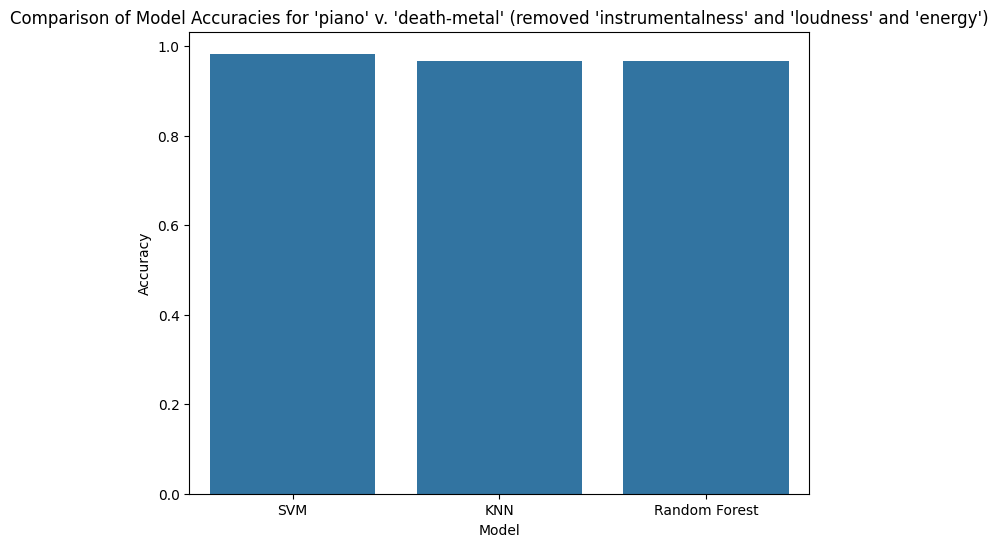

In [941]:
# Comparison of Model Accuracies
model_names = ['SVM', 'KNN', 'Random Forest']
accuracies = [accuracy_score(y_test, y_pred_svm), accuracy_score(y_test, y_pred_knn), accuracy_score(y_test, y_pred_rf)]

plt.figure(figsize=(8, 6))
sns.barplot(x=model_names, y=accuracies)
plt.xlabel("Model")
plt.ylabel("Accuracy")
plt.title("Comparison of Model Accuracies for 'piano' v. 'death-metal' (removed 'instrumentalness' and 'loudness' and 'energy')")
plt.show()

In [942]:
#Observations of BINARY EXPERIMENT, PART 4:  Two Genres and Three Removed Features:
#SVM Accuracy:  0.98333; KNN Accuracy: 0.96667; Random Forest Accuracy: 0.96667

In [943]:
# I.D.  BINARY EXPERIMENT, PART 5:  Two Genres and Four Removed Features

In [944]:
# Now remove three features, including the features removed in Parts 2 and 3:

In [945]:
# Note:  Choose four "features" whose Correlation Matrix have
#        many feature intersections with |R|>0.7 and yet (ideally) their
#        features have the THREE LOWEST |R| individually with "track_genre."

In [946]:
# Example: remove_features = ['danceability', 'liveness', 'speechiness', 'instrumentalness', 'duration_ms']
#remove_features = ['instrumentalness', 'loudness', 'energy', 'acousticness']  # <- Enter  features to remove here
remove_features = ['acousticness']  # <- # 'instrumentalness,' 'loudness,' and 'energy have already been removed
                                         #     in Parts 2, 3, and 4

# Drop the selected features
df.drop(columns=remove_features, inplace=True)

## Prepare Data for Modeling

Split the data into training and testing sets and standardize the features.

In [947]:
# Feature and target selection
X = df.drop(columns=['track_genre'])
y = df['track_genre']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Model Training and Evaluation

Train and evaluate three models: Support Vector Machine (SVM), K-Nearest Neighbors (KNN), and Random Forest. Compare their accuracies to find the best-performing model.

In [948]:
# 1. Support Vector Machine (SVM)
print("\nSupport Vector Machine (SVM) Results:")
svm = SVC()
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)
print("SVM Accuracy:", accuracy_score(y_test, y_pred_svm))
print("Classification Report:\n", classification_report(y_test, y_pred_svm))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_svm))


Support Vector Machine (SVM) Results:
SVM Accuracy: 0.9666666666666667
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.97      0.97        31
           1       0.97      0.97      0.97        29

    accuracy                           0.97        60
   macro avg       0.97      0.97      0.97        60
weighted avg       0.97      0.97      0.97        60

Confusion Matrix:
 [[30  1]
 [ 1 28]]


In [949]:
# 2. K-Nearest Neighbors (KNN)
print("\nK-Nearest Neighbors (KNN) Results:")
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)
print("KNN Accuracy:", accuracy_score(y_test, y_pred_knn))
print("Classification Report:\n", classification_report(y_test, y_pred_knn))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_knn))


K-Nearest Neighbors (KNN) Results:
KNN Accuracy: 0.9166666666666666
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.94      0.92        31
           1       0.93      0.90      0.91        29

    accuracy                           0.92        60
   macro avg       0.92      0.92      0.92        60
weighted avg       0.92      0.92      0.92        60

Confusion Matrix:
 [[29  2]
 [ 3 26]]


In [950]:
# 3. Random Forest
print("\nRandom Forest Results:")
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Classification Report:\n", classification_report(y_test, y_pred_rf))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))


Random Forest Results:
Random Forest Accuracy: 0.9
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.94      0.91        31
           1       0.93      0.86      0.89        29

    accuracy                           0.90        60
   macro avg       0.90      0.90      0.90        60
weighted avg       0.90      0.90      0.90        60

Confusion Matrix:
 [[29  2]
 [ 4 25]]


## Model Comparison

Compare model accuracies to determine the best model for genre classification.

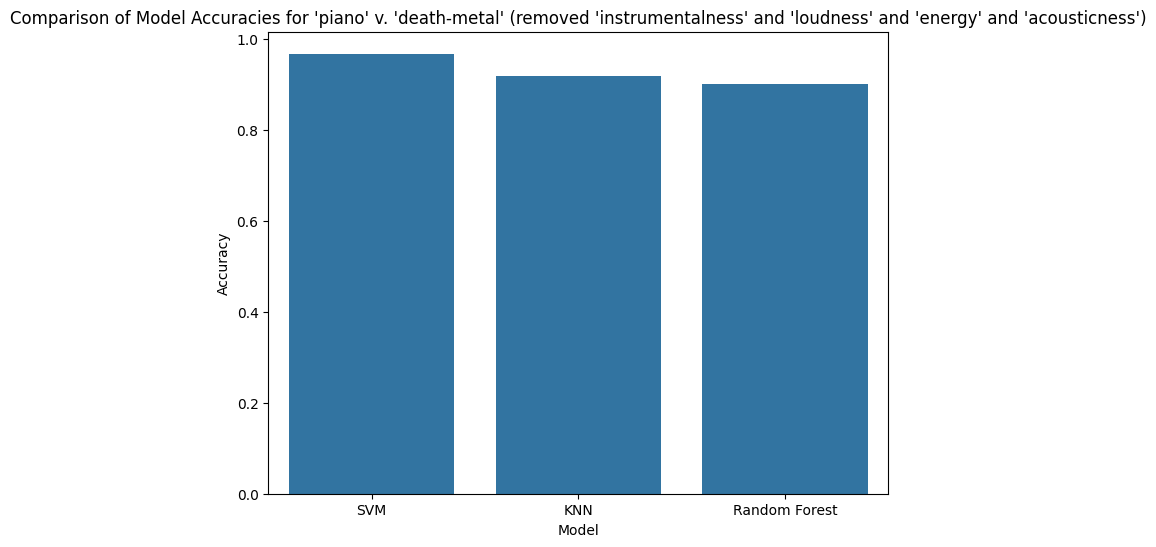

In [951]:
# Comparison of Model Accuracies
model_names = ['SVM', 'KNN', 'Random Forest']
accuracies = [accuracy_score(y_test, y_pred_svm), accuracy_score(y_test, y_pred_knn), accuracy_score(y_test, y_pred_rf)]

plt.figure(figsize=(8, 6))
sns.barplot(x=model_names, y=accuracies)
plt.xlabel("Model")
plt.ylabel("Accuracy")
plt.title("Comparison of Model Accuracies for 'piano' v. 'death-metal' (removed 'instrumentalness' and 'loudness' and 'energy' and 'acousticness')")
plt.show()

In [952]:
#Observations of BINARY EXPERIMENT, PART 5:  Two Genres and Four Removed Features:
#SVM Accuracy:  0.96667; KNN Accuracy: 0.91667; Random Forest Accuracy: 0.9

## II.  MULTICLASS EXPERIMENT

## Load and Explore Dataset
It’s essential to load and explore your dataset to understand its structure, identify any missing or inconsistent values, and get a sense of the types of features available. This initial exploration helps you make informed decisions about data cleaning, feature selection, and preprocessing steps.

In [953]:
# Load the dataset
df = pd.read_csv('dataset.csv')

# Display initial dataset information
print("First 5 rows of the dataset:")
print(df.head(5))
print("\nInitial Data Overview:")
print(df.info())
print("\nStatistical Summary:")
print(df.describe())

First 5 rows of the dataset:
   Unnamed: 0                track_id                 artists  \
0           0  5SuOikwiRyPMVoIQDJUgSV             Gen Hoshino   
1           1  4qPNDBW1i3p13qLCt0Ki3A            Ben Woodward   
2           2  1iJBSr7s7jYXzM8EGcbK5b  Ingrid Michaelson;ZAYN   
3           3  6lfxq3CG4xtTiEg7opyCyx            Kina Grannis   
4           4  5vjLSffimiIP26QG5WcN2K        Chord Overstreet   

                                          album_name  \
0                                             Comedy   
1                                   Ghost (Acoustic)   
2                                     To Begin Again   
3  Crazy Rich Asians (Original Motion Picture Sou...   
4                                            Hold On   

                   track_name  popularity  duration_ms  explicit  \
0                      Comedy          73       230666     False   
1            Ghost - Acoustic          55       149610     False   
2              To Begin Again          

## Select Genres

For this project, you’ll conduct three classification experiments. One experiment should be binary (classifying between two genres), while the other two will be multiclass (classifying among multiple genres).

Choose Your Genres
Below are some genre options available in the dataset:

`['rock', 'rap', 'jazz', 'latin', 'country', 'pop', 'classical', 'electronic', 'acoustic', 'r-and-b']`

Feel free to explore the dataset if you'd like to use other genres, this dataset has over 100 genres available!

#Instructions
**Binary Experiment:** Choose two genres that you want to classify between (e.g., Rock vs. Jazz). This experiment will help you understand classification when only two classes are present.

**Multiclass Experiments:** For the other two experiments, choose three or more genres to create multiclass classification problems (e.g., Rock, Pop, and Classical). These experiments will show how classification models perform with more categories.



In [954]:
# II.A.  MULTICLASS EXPERIMENT, PART 1:  Three Genres and No Removed Features

In [955]:
# Note:  How to select THREE genres for "selected_genres" list:
#        Repeatly, randomly choose THREE genres out of the 100+ in
#        "track_genre."  Then run the
#               sns.heatmap(corr_matrix)
#        command to create the Correlation Matrix of features
#        and run the SVP, KNN, and Random Forest Methods to find
#        method accuracies.
#
#        Ultimately, choose the genre TRIPLE whose method accuracies are
#        highest and Correlation Matrix has many feature intersections
#        with |R|>0.7 and yet (ideally) their features have low |R|
#        individually with "track_genre."

In [956]:
# Example: selected_genres = ['rock', 'rap', 'jazz', 'latin', 'country', 'pop']
selected_genres = ['jazz', 'sleep', 'ska']  # <- Enter your genres here

# Filter for the selected genres
df = df[df['track_genre'].isin(selected_genres)]

# Limit the dataset to a sample of 100 tracks per selected genre
df = df.groupby('track_genre').apply(lambda x: x.sample(100, random_state=42)).reset_index(drop=True)

<ipython-input-956-e5e727d96347>:8: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df = df.groupby('track_genre').apply(lambda x: x.sample(100, random_state=42)).reset_index(drop=True)


## Data Cleaning and Preparation

Preparing data for machine learning involves selecting relevant columns, handling missing values, and encoding categorical variables. First, selecting only the most relevant columns focuses the dataset on essential features, simplifying the model and often improving performance. Next, handling missing values is crucial because incomplete data can disrupt model training; we address this by either removing rows with missing entries or filling them in with appropriate values, such as the mean or median. Finally, encoding categorical variables (like genre) into numerical format allows machine learning algorithms to process non-numeric data. By assigning a unique number to each category using label encoding, we enable the model to interpret these variables accurately, making our dataset ready for analysis.


In [957]:
# Select relevant columns
df = df[['danceability', 'energy', 'loudness', 'speechiness', 'acousticness',
         'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms', 'explicit', 'track_genre']]

# Drop any rows with missing values
df.dropna(inplace=True)

# Convert 'track_genre' to numerical values (Label Encoding)
label_encoder = LabelEncoder()
df['track_genre'] = label_encoder.fit_transform(df['track_genre'])

# Convert 'explicit' to binary 1/0
df['explicit'] = df['explicit'].astype(int)

# Show class distribution for genres after filtering and sampling
print("\nSampled Genre Distribution:")
print(df['track_genre'].value_counts())


Sampled Genre Distribution:
track_genre
0    100
1    100
2    100
Name: count, dtype: int64


## Correlation Analysis

The heatmap above shows correlations between features in the dataset. High correlation values (close to 1 or -1) indicate features that likely carry similar information. Removing one of these correlated features can reduce the dataset’s dimensionality, making the model simpler and potentially improving performance.



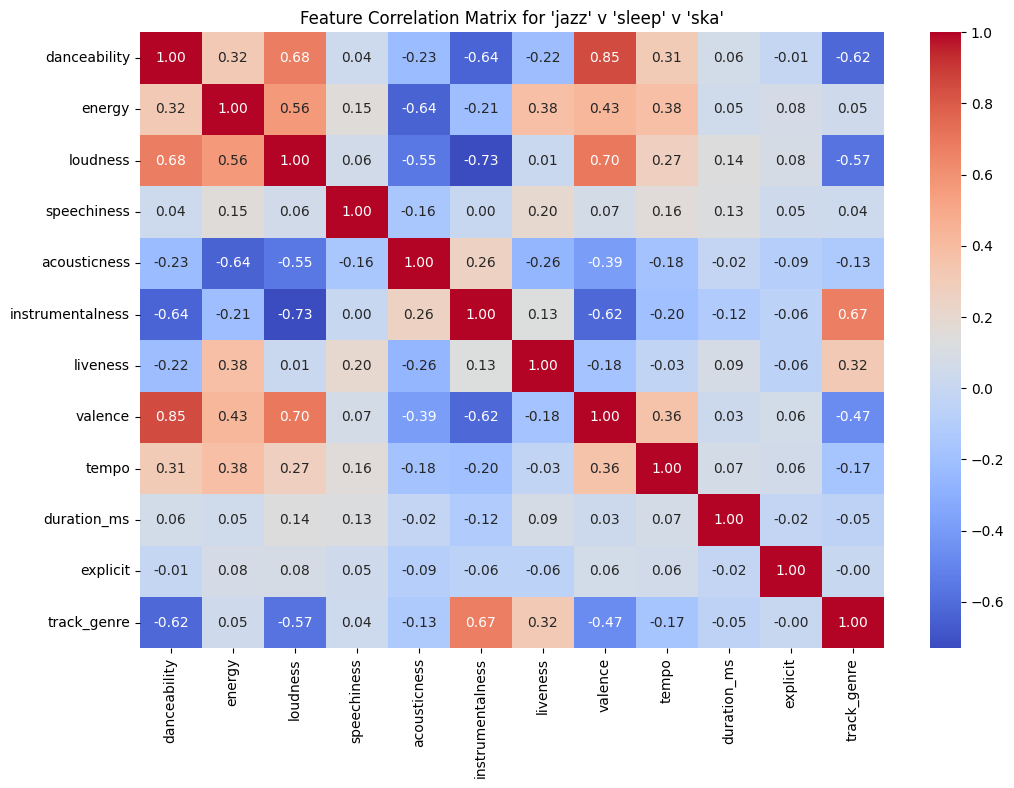

In [958]:

# Heatmap Correlation Matrix
plt.figure(figsize=(12, 8))
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Matrix for 'jazz' v 'sleep' v 'ska'")
plt.show()



## Feature Selection Experiments
**Experiment 1: Train with all features**
Train your models (SVM, KNN, and Random Forest) using all features to establish a baseline. You can do this by running the rest of the notebook without making any changes.

**Experiment 2: Remove one highly correlated feature**
Identify a pair of features with a correlation around |0.7| or higher, then remove one and re-train your models. Note any differences compared to the baseline.

**Experiment 3: Remove multiple correlated features**
Remove multiple features with correlations around |0.7| or higher. Re-train your models and compare these results with both the baseline and Experiment 2.

These experiments will help you understand the impact of correlated features on model performance.

In [959]:
# This is still MULTICLASS EXPERIMENT, PART 1, so NO features are removed below

In [960]:
# Example: remove_features = ['danceability', 'liveness', 'speechiness', 'instrumentalness', 'duration_ms']
remove_features = []  # <- Enter  features to remove here

# Drop the selected features
df.drop(columns=remove_features, inplace=True)

## Prepare Data for Modeling

Split the data into training and testing sets and standardize the features.

In [961]:
# Feature and target selection
X = df.drop(columns=['track_genre'])
y = df['track_genre']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Model Training and Evaluation

Train and evaluate three models: Support Vector Machine (SVM), K-Nearest Neighbors (KNN), and Random Forest. Compare their accuracies to find the best-performing model.

In [962]:
# 1. Support Vector Machine (SVM)
print("\nSupport Vector Machine (SVM) Results:")
svm = SVC()
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)
print("SVM Accuracy:", accuracy_score(y_test, y_pred_svm))
print("Classification Report:\n", classification_report(y_test, y_pred_svm))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_svm))


Support Vector Machine (SVM) Results:
SVM Accuracy: 0.9111111111111111
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.89      0.90        35
           1       0.88      1.00      0.93        28
           2       0.96      0.85      0.90        27

    accuracy                           0.91        90
   macro avg       0.92      0.91      0.91        90
weighted avg       0.91      0.91      0.91        90

Confusion Matrix:
 [[31  3  1]
 [ 0 28  0]
 [ 3  1 23]]


In [963]:
# 2. K-Nearest Neighbors (KNN)
print("\nK-Nearest Neighbors (KNN) Results:")
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)
print("KNN Accuracy:", accuracy_score(y_test, y_pred_knn))
print("Classification Report:\n", classification_report(y_test, y_pred_knn))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_knn))


K-Nearest Neighbors (KNN) Results:
KNN Accuracy: 0.8444444444444444
Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.86      0.81        35
           1       0.87      0.96      0.92        28
           2       0.95      0.70      0.81        27

    accuracy                           0.84        90
   macro avg       0.86      0.84      0.84        90
weighted avg       0.86      0.84      0.84        90

Confusion Matrix:
 [[30  4  1]
 [ 1 27  0]
 [ 8  0 19]]


In [964]:
# 3. Random Forest
print("\nRandom Forest Results:")
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Classification Report:\n", classification_report(y_test, y_pred_rf))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))


Random Forest Results:
Random Forest Accuracy: 0.9444444444444444
Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.91      0.93        35
           1       0.93      1.00      0.97        28
           2       0.96      0.93      0.94        27

    accuracy                           0.94        90
   macro avg       0.95      0.95      0.95        90
weighted avg       0.94      0.94      0.94        90

Confusion Matrix:
 [[32  2  1]
 [ 0 28  0]
 [ 2  0 25]]


## Model Comparison

Compare model accuracies to determine the best model for genre classification.

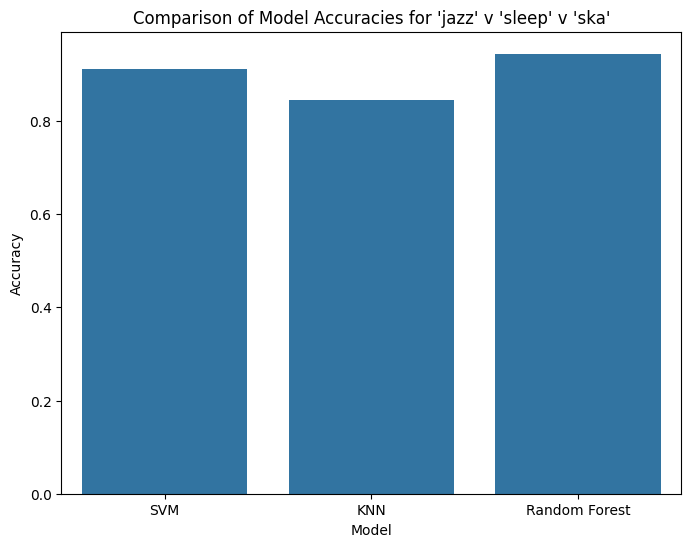

In [965]:
# Comparison of Model Accuracies
model_names = ['SVM', 'KNN', 'Random Forest']
accuracies = [accuracy_score(y_test, y_pred_svm), accuracy_score(y_test, y_pred_knn), accuracy_score(y_test, y_pred_rf)]

plt.figure(figsize=(8, 6))
sns.barplot(x=model_names, y=accuracies)
plt.xlabel("Model")
plt.ylabel("Accuracy")
plt.title("Comparison of Model Accuracies for 'jazz' v 'sleep' v 'ska'")
plt.show()

In [966]:
#Observations of MULTICLASS EXPERIMENT, PART 1:  Three Genres and No Removed Features:
#SVM Accuracy:  0.91111; KNN Accuracy: 0.84444; Random Forest Accuracy: 0.94444


In [967]:
# II.B.  MULTICLASS EXPERIMENT, PART 2:  Three Genres and One Removed Feature

In [968]:
# Now remove one feature:

In [969]:
# Note:  Choose a "feature" whose Correlation Matrix has
#        many feature intersections with |R|>0.7 and yet (ideally) its
#        feature has the LOWEST |R| with "track_genre."

In [970]:
# Example: remove_features = ['danceability', 'liveness', 'speechiness', 'instrumentalness', 'duration_ms']
remove_features = ['loudness']  # <- Enter  features to remove here

# Drop the selected features
df.drop(columns=remove_features, inplace=True)

## Prepare Data for Modeling

Split the data into training and testing sets and standardize the features.

In [971]:
# Feature and target selection
X = df.drop(columns=['track_genre'])
y = df['track_genre']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Model Training and Evaluation

Train and evaluate three models: Support Vector Machine (SVM), K-Nearest Neighbors (KNN), and Random Forest. Compare their accuracies to find the best-performing model.

In [972]:
# 1. Support Vector Machine (SVM)
print("\nSupport Vector Machine (SVM) Results:")
svm = SVC()
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)
print("SVM Accuracy:", accuracy_score(y_test, y_pred_svm))
print("Classification Report:\n", classification_report(y_test, y_pred_svm))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_svm))


Support Vector Machine (SVM) Results:
SVM Accuracy: 0.9111111111111111
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.89      0.90        35
           1       0.88      1.00      0.93        28
           2       0.96      0.85      0.90        27

    accuracy                           0.91        90
   macro avg       0.92      0.91      0.91        90
weighted avg       0.91      0.91      0.91        90

Confusion Matrix:
 [[31  3  1]
 [ 0 28  0]
 [ 3  1 23]]


In [973]:
# 2. K-Nearest Neighbors (KNN)
print("\nK-Nearest Neighbors (KNN) Results:")
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)
print("KNN Accuracy:", accuracy_score(y_test, y_pred_knn))
print("Classification Report:\n", classification_report(y_test, y_pred_knn))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_knn))


K-Nearest Neighbors (KNN) Results:
KNN Accuracy: 0.8555555555555555
Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.86      0.82        35
           1       0.87      0.96      0.92        28
           2       0.95      0.74      0.83        27

    accuracy                           0.86        90
   macro avg       0.87      0.85      0.86        90
weighted avg       0.86      0.86      0.85        90

Confusion Matrix:
 [[30  4  1]
 [ 1 27  0]
 [ 7  0 20]]


In [974]:
# 3. Random Forest
print("\nRandom Forest Results:")
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Classification Report:\n", classification_report(y_test, y_pred_rf))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))


Random Forest Results:
Random Forest Accuracy: 0.9444444444444444
Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.91      0.93        35
           1       0.93      1.00      0.97        28
           2       0.96      0.93      0.94        27

    accuracy                           0.94        90
   macro avg       0.95      0.95      0.95        90
weighted avg       0.94      0.94      0.94        90

Confusion Matrix:
 [[32  2  1]
 [ 0 28  0]
 [ 2  0 25]]


## Model Comparison

Compare model accuracies to determine the best model for genre classification.

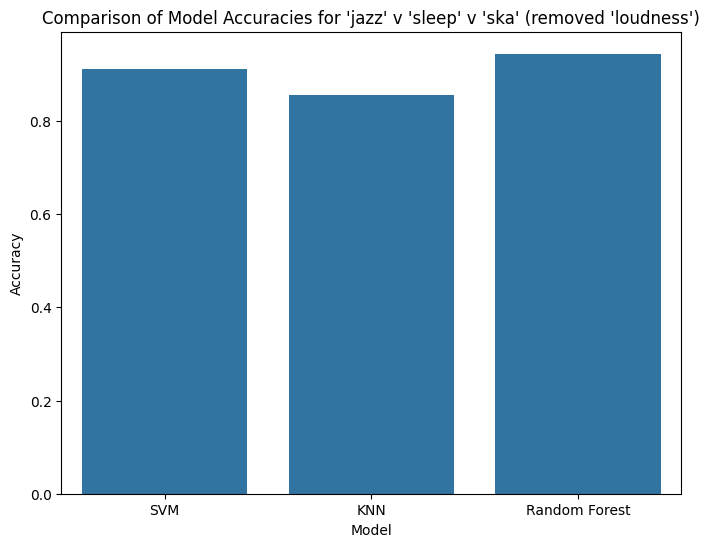

In [975]:
# Comparison of Model Accuracies
model_names = ['SVM', 'KNN', 'Random Forest']
accuracies = [accuracy_score(y_test, y_pred_svm), accuracy_score(y_test, y_pred_knn), accuracy_score(y_test, y_pred_rf)]

plt.figure(figsize=(8, 6))
sns.barplot(x=model_names, y=accuracies)
plt.xlabel("Model")
plt.ylabel("Accuracy")
plt.title("Comparison of Model Accuracies for 'jazz' v 'sleep' v 'ska' (removed 'loudness')")
plt.show()

In [976]:
#Observations of MULTICLASS EXPERIMENT, PART 2:  Two Genres and One Removed Feature:
#SVM Accuracy:  0.91111; KNN Accuracy: 0.85556; Random Forest Accuracy: 0.94444

In [977]:
# II.C.  MULTICLASS EXPERIMENT, PART 3:  Three Genres and Two Removed Features

In [978]:
# Now remove two features, including the feature removed in Part 2:

In [979]:
# Note:  Choose two "features" whose Correlation Matrix have
#        many feature intersections with |R|>0.7 and yet (ideally) their
#        features have the TWO LOWEST |R| individually with "track_genre."

In [980]:
# Example: remove_features = ['danceability', 'liveness', 'speechiness', 'instrumentalness', 'duration_ms']
#remove_features = ['loudness', 'danceability']  # <- Enter  features to remove here
remove_features = ['danceability']  # <- # 'loudness' has already been removed in Part 2

# Drop the selected features
df.drop(columns=remove_features, inplace=True)

## Prepare Data for Modeling

Split the data into training and testing sets and standardize the features.

In [981]:
# Feature and target selection
X = df.drop(columns=['track_genre'])
y = df['track_genre']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Model Training and Evaluation

Train and evaluate three models: Support Vector Machine (SVM), K-Nearest Neighbors (KNN), and Random Forest. Compare their accuracies to find the best-performing model.

In [982]:
# 1. Support Vector Machine (SVM)
print("\nSupport Vector Machine (SVM) Results:")
svm = SVC()
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)
print("SVM Accuracy:", accuracy_score(y_test, y_pred_svm))
print("Classification Report:\n", classification_report(y_test, y_pred_svm))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_svm))


Support Vector Machine (SVM) Results:
SVM Accuracy: 0.8888888888888888
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.86      0.88        35
           1       0.87      0.96      0.92        28
           2       0.88      0.85      0.87        27

    accuracy                           0.89        90
   macro avg       0.89      0.89      0.89        90
weighted avg       0.89      0.89      0.89        90

Confusion Matrix:
 [[30  3  2]
 [ 0 27  1]
 [ 3  1 23]]


In [983]:
# 2. K-Nearest Neighbors (KNN)
print("\nK-Nearest Neighbors (KNN) Results:")
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)
print("KNN Accuracy:", accuracy_score(y_test, y_pred_knn))
print("Classification Report:\n", classification_report(y_test, y_pred_knn))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_knn))


K-Nearest Neighbors (KNN) Results:
KNN Accuracy: 0.8444444444444444
Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.86      0.81        35
           1       0.90      0.96      0.93        28
           2       0.90      0.70      0.79        27

    accuracy                           0.84        90
   macro avg       0.86      0.84      0.84        90
weighted avg       0.85      0.84      0.84        90

Confusion Matrix:
 [[30  3  2]
 [ 1 27  0]
 [ 8  0 19]]


In [984]:
# 3. Random Forest
print("\nRandom Forest Results:")
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Classification Report:\n", classification_report(y_test, y_pred_rf))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))


Random Forest Results:
Random Forest Accuracy: 0.9222222222222223
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.89      0.90        35
           1       0.93      1.00      0.97        28
           2       0.92      0.89      0.91        27

    accuracy                           0.92        90
   macro avg       0.92      0.92      0.92        90
weighted avg       0.92      0.92      0.92        90

Confusion Matrix:
 [[31  2  2]
 [ 0 28  0]
 [ 3  0 24]]


## Model Comparison

Compare model accuracies to determine the best model for genre classification.

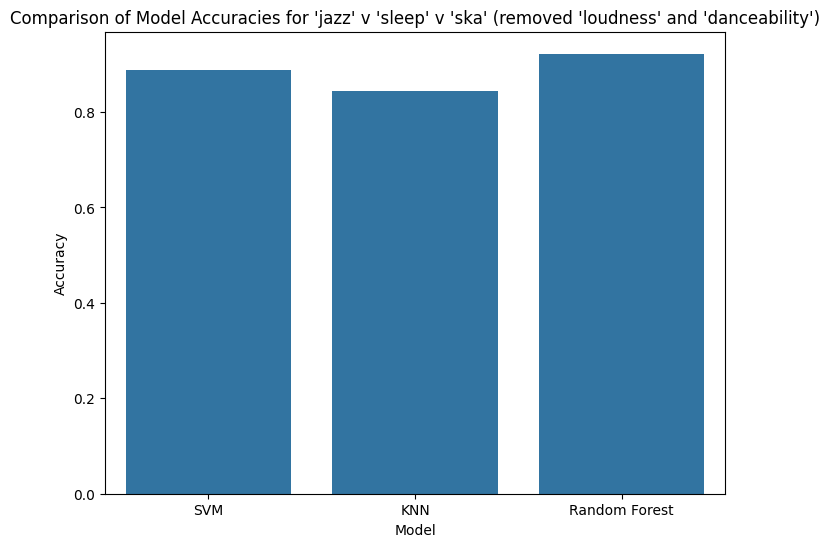

In [985]:
# Comparison of Model Accuracies
model_names = ['SVM', 'KNN', 'Random Forest']
accuracies = [accuracy_score(y_test, y_pred_svm), accuracy_score(y_test, y_pred_knn), accuracy_score(y_test, y_pred_rf)]

plt.figure(figsize=(8, 6))
sns.barplot(x=model_names, y=accuracies)
plt.xlabel("Model")
plt.ylabel("Accuracy")
plt.title("Comparison of Model Accuracies for 'jazz' v 'sleep' v 'ska' (removed 'loudness' and 'danceability')")
plt.show()

In [986]:
#Observations of MULTICLASS EXPERIMENT, PART 3:  Two Genres and Two Removed Features:
#SVM Accuracy:  0.88889; KNN Accuracy: 0.84444; Random Forest Accuracy: 0.92222

In [987]:
# II.D  MULTICLASS EXPERIMENT, PART 4:  Three Genres and Three Removed Features

In [988]:
# Now remove three features, including the features removed in Parts 2 and 3:

In [989]:
# Note:  Choose two "features" whose Correlation Matrix have
#        many feature intersections with |R|>0.7 and yet (ideally) their
#        features have the TWO LOWEST |R| individually with "track_genre."

In [990]:
# Example: remove_features = ['danceability', 'liveness', 'speechiness', 'instrumentalness', 'duration_ms']
#remove_features = ['loudness', 'danceability', 'energy']  # <- Enter  features to remove here
remove_features = ['energy']  # <- # 'loudness' and 'danceability' have been previously removed in Parts 2 and 3

# Drop the selected features
df.drop(columns=remove_features, inplace=True)

## Prepare Data for Modeling

Split the data into training and testing sets and standardize the features.

In [991]:
# Feature and target selection
X = df.drop(columns=['track_genre'])
y = df['track_genre']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Model Training and Evaluation

Train and evaluate three models: Support Vector Machine (SVM), K-Nearest Neighbors (KNN), and Random Forest. Compare their accuracies to find the best-performing model.

In [992]:
# 1. Support Vector Machine (SVM)
print("\nSupport Vector Machine (SVM) Results:")
svm = SVC()
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)
print("SVM Accuracy:", accuracy_score(y_test, y_pred_svm))
print("Classification Report:\n", classification_report(y_test, y_pred_svm))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_svm))


Support Vector Machine (SVM) Results:
SVM Accuracy: 0.8444444444444444
Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.80      0.80        35
           1       0.84      0.93      0.88        28
           2       0.92      0.81      0.86        27

    accuracy                           0.84        90
   macro avg       0.85      0.85      0.85        90
weighted avg       0.85      0.84      0.84        90

Confusion Matrix:
 [[28  5  2]
 [ 2 26  0]
 [ 5  0 22]]


In [993]:
# 2. K-Nearest Neighbors (KNN)
print("\nK-Nearest Neighbors (KNN) Results:")
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)
print("KNN Accuracy:", accuracy_score(y_test, y_pred_knn))
print("Classification Report:\n", classification_report(y_test, y_pred_knn))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_knn))


K-Nearest Neighbors (KNN) Results:
KNN Accuracy: 0.8444444444444444
Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.80      0.80        35
           1       0.85      1.00      0.92        28
           2       0.91      0.74      0.82        27

    accuracy                           0.84        90
   macro avg       0.85      0.85      0.84        90
weighted avg       0.85      0.84      0.84        90

Confusion Matrix:
 [[28  5  2]
 [ 0 28  0]
 [ 7  0 20]]


In [994]:
# 3. Random Forest
print("\nRandom Forest Results:")
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Classification Report:\n", classification_report(y_test, y_pred_rf))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))


Random Forest Results:
Random Forest Accuracy: 0.8888888888888888
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.83      0.85        35
           1       0.87      0.96      0.92        28
           2       0.92      0.89      0.91        27

    accuracy                           0.89        90
   macro avg       0.89      0.89      0.89        90
weighted avg       0.89      0.89      0.89        90

Confusion Matrix:
 [[29  4  2]
 [ 1 27  0]
 [ 3  0 24]]


## Model Comparison

Compare model accuracies to determine the best model for genre classification.

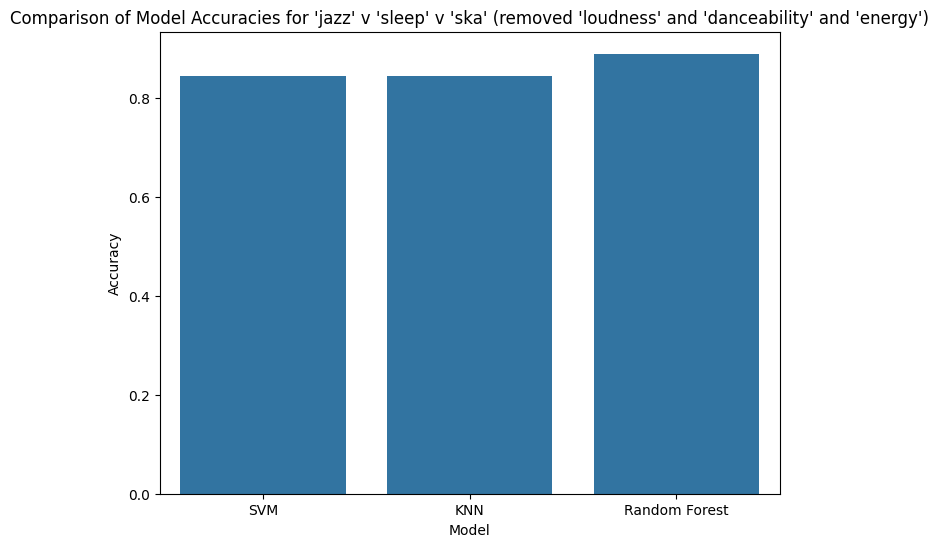

In [995]:
# Comparison of Model Accuracies
model_names = ['SVM', 'KNN', 'Random Forest']
accuracies = [accuracy_score(y_test, y_pred_svm), accuracy_score(y_test, y_pred_knn), accuracy_score(y_test, y_pred_rf)]

plt.figure(figsize=(8, 6))
sns.barplot(x=model_names, y=accuracies)
plt.xlabel("Model")
plt.ylabel("Accuracy")
plt.title("Comparison of Model Accuracies for 'jazz' v 'sleep' v 'ska' (removed 'loudness' and 'danceability' and 'energy')")
plt.show()

In [996]:
#Observations of MULTICLASS EXPERIMENT, PART 4:  Two Genres and Three Removed Features:
#SVM Accuracy:  0.87778; KNN Accuracy: 0.83333; Random Forest Accuracy: 0.9

In [997]:
# II.E.  MULTICLASS EXPERIMENT, PART 5:  Three Genres and Four Removed Features

In [998]:
# Now remove four features, including the features removed in Parts 2, 3, and 4:

In [999]:
# Note:  Choose two "features" whose Correlation Matrix have
#        many feature intersections with |R|>0.7 and yet (ideally) their
#        features have the TWO LOWEST |R| individually with "track_genre."

In [1000]:
# Specific Note:  'liveness' was removed instead of 'valence' because
#                 removing 'liveness' results in better model accuracies
#                 than removing 'liveness'

In [1001]:
# Example: remove_features = ['danceability', 'liveness', 'speechiness', 'instrumentalness', 'duration_ms']
#remove_features = ['loudness', 'danceability', 'instrumentalness', 'liveness']  # <- Enter  features to remove here
remove_features = ['liveness']  # <- # 'loudness,' 'danceability,' 'instrumentalness'
#                                       have been previously removed in Parts 2, 3, and 4

# Drop the selected features
df.drop(columns=remove_features, inplace=True)

## Prepare Data for Modeling

Split the data into training and testing sets and standardize the features.

In [1002]:
# Feature and target selection
X = df.drop(columns=['track_genre'])
y = df['track_genre']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Model Training and Evaluation

Train and evaluate three models: Support Vector Machine (SVM), K-Nearest Neighbors (KNN), and Random Forest. Compare their accuracies to find the best-performing model.

In [1003]:
# 1. Support Vector Machine (SVM)
print("\nSupport Vector Machine (SVM) Results:")
svm = SVC()
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)
print("SVM Accuracy:", accuracy_score(y_test, y_pred_svm))
print("Classification Report:\n", classification_report(y_test, y_pred_svm))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_svm))


Support Vector Machine (SVM) Results:
SVM Accuracy: 0.8666666666666667
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.83      0.84        35
           1       0.87      0.93      0.90        28
           2       0.88      0.85      0.87        27

    accuracy                           0.87        90
   macro avg       0.87      0.87      0.87        90
weighted avg       0.87      0.87      0.87        90

Confusion Matrix:
 [[29  4  2]
 [ 1 26  1]
 [ 4  0 23]]


In [1004]:
# 2. K-Nearest Neighbors (KNN)
print("\nK-Nearest Neighbors (KNN) Results:")
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)
print("KNN Accuracy:", accuracy_score(y_test, y_pred_knn))
print("Classification Report:\n", classification_report(y_test, y_pred_knn))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_knn))


K-Nearest Neighbors (KNN) Results:
KNN Accuracy: 0.8555555555555555
Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.83      0.82        35
           1       0.88      1.00      0.93        28
           2       0.91      0.74      0.82        27

    accuracy                           0.86        90
   macro avg       0.86      0.86      0.86        90
weighted avg       0.86      0.86      0.85        90

Confusion Matrix:
 [[29  4  2]
 [ 0 28  0]
 [ 7  0 20]]


In [1005]:
# 3. Random Forest
print("\nRandom Forest Results:")
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Classification Report:\n", classification_report(y_test, y_pred_rf))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))


Random Forest Results:
Random Forest Accuracy: 0.8888888888888888
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.83      0.85        35
           1       0.87      0.96      0.92        28
           2       0.92      0.89      0.91        27

    accuracy                           0.89        90
   macro avg       0.89      0.89      0.89        90
weighted avg       0.89      0.89      0.89        90

Confusion Matrix:
 [[29  4  2]
 [ 1 27  0]
 [ 3  0 24]]


## Model Comparison

Compare model accuracies to determine the best model for genre classification.

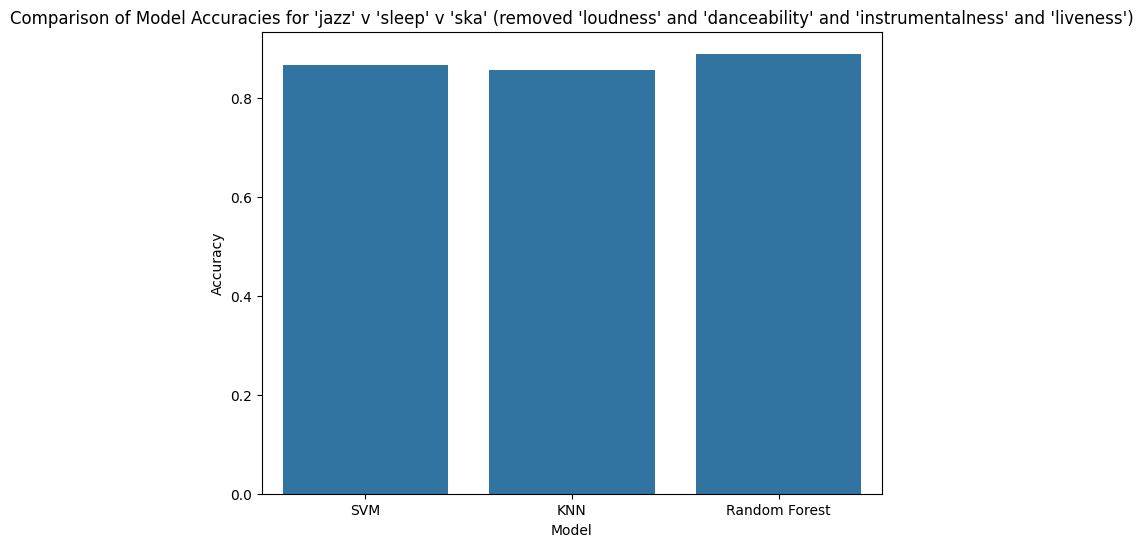

In [1006]:
# Comparison of Model Accuracies
model_names = ['SVM', 'KNN', 'Random Forest']
accuracies = [accuracy_score(y_test, y_pred_svm), accuracy_score(y_test, y_pred_knn), accuracy_score(y_test, y_pred_rf)]

plt.figure(figsize=(8, 6))
sns.barplot(x=model_names, y=accuracies)
plt.xlabel("Model")
plt.ylabel("Accuracy")
plt.title("Comparison of Model Accuracies for 'jazz' v 'sleep' v 'ska' (removed 'loudness' and 'danceability' and 'instrumentalness' and 'liveness')")
plt.show()

In [1007]:
#Observations of MULTICLASS EXPERIMENT, PART 5:  Two Genres and Four Removed Features:
#SVM Accuracy:  0.87778; KNN Accuracy: 0.83333; Random Forest Accuracy: 0.9

## Summary


**I. BINARY EXPERIMENT:**

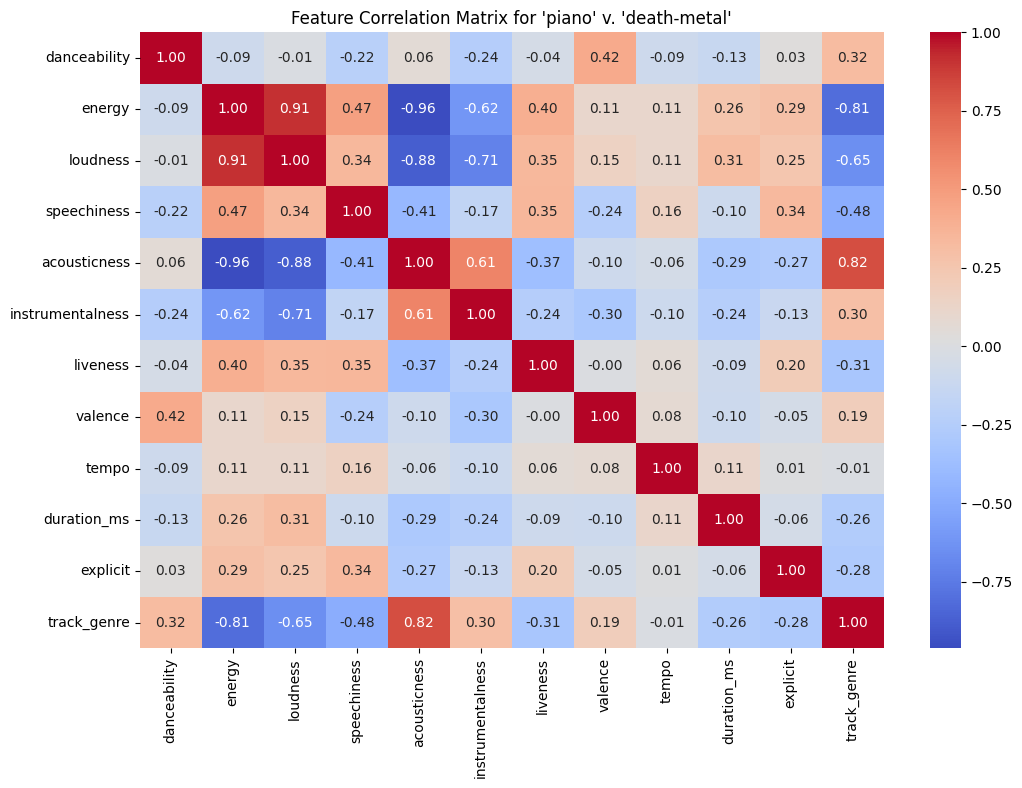

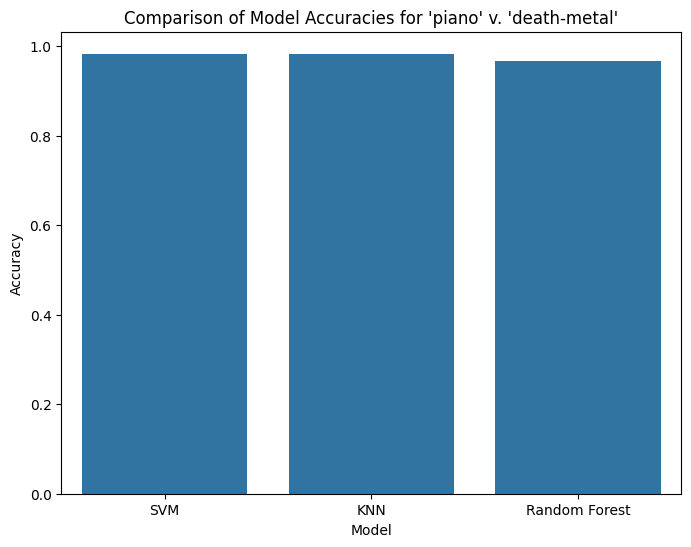

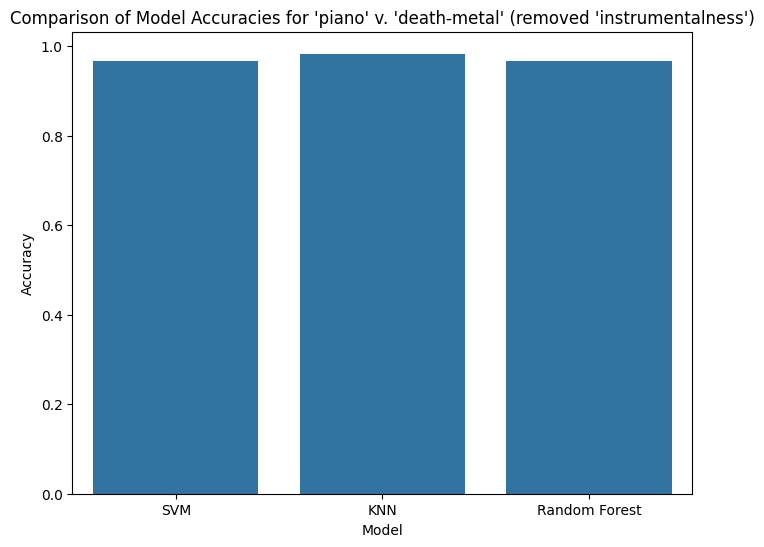

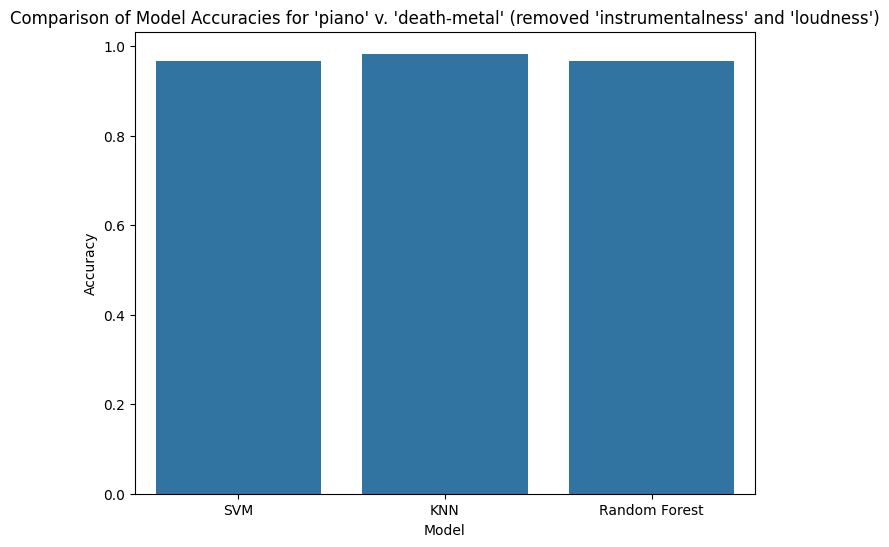

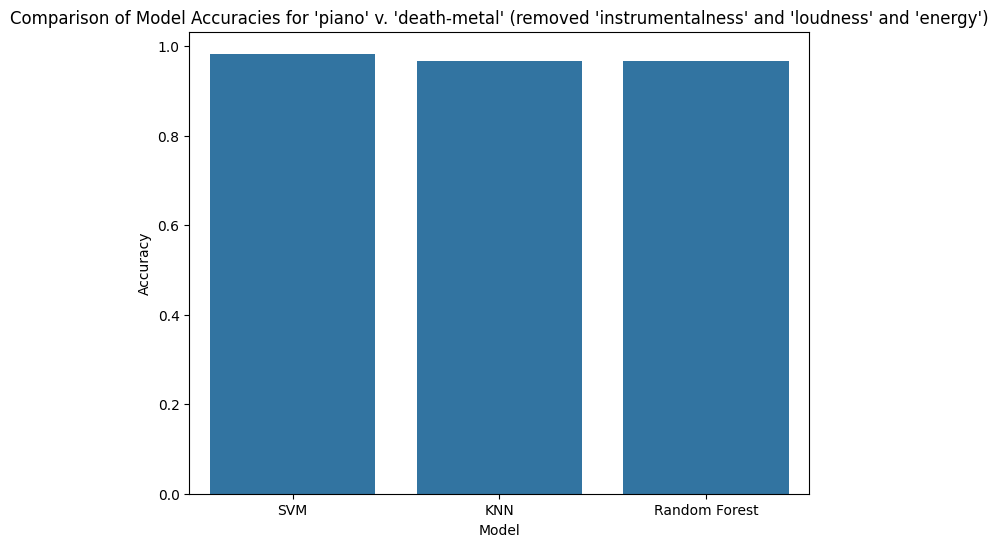

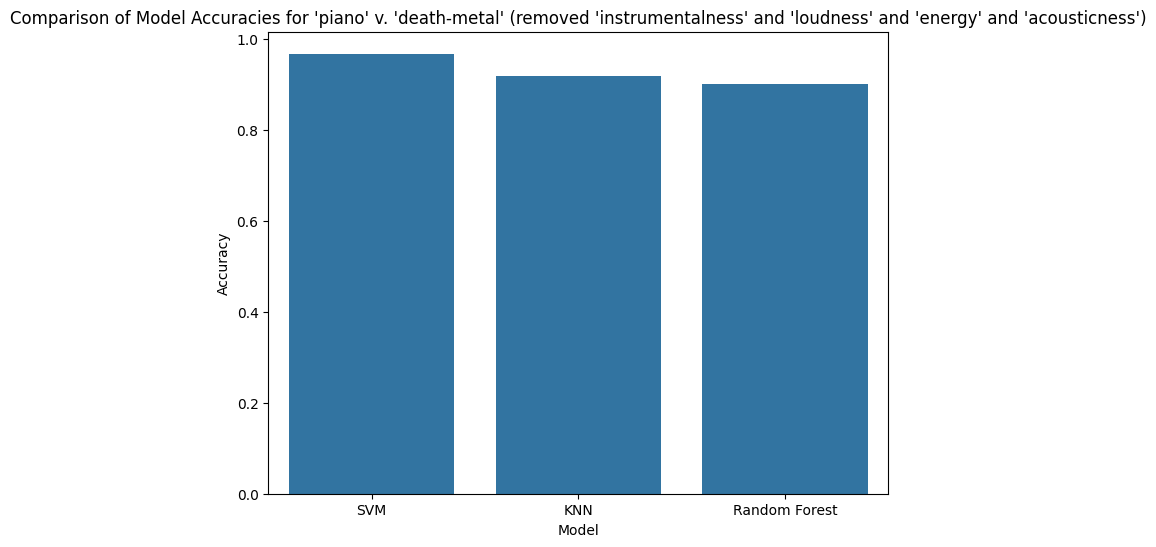

In [1008]:
#Observations of BINARY EXPERIMENT, PART 1:  Two Genres and No Removed Features:
#SVM Accuracy:  0.98333; KNN Accuracy: 0.98333; Random Forest Accuracy: 0.96667


In [1009]:
#Observations of BINARY EXPERIMENT, PART 2:  Two Genres and One Removed Feature:
#SVM Accuracy:  0.96667; KNN Accuracy: 0.98333; Random Forest Accuracy: 0.96667

In [1010]:
#Observations of BINARY EXPERIMENT, PART 3:  Two Genres and Two Removed Features:
#SVM Accuracy:  0.96667; KNN Accuracy: 0.98333; Random Forest Accuracy: 0.96667

In [1011]:
#Observations of BINARY EXPERIMENT, PART 4:  Two Genres and Three Removed Features:
#SVM Accuracy:  0.98333; KNN Accuracy: 0.96667; Random Forest Accuracy: 0.96667

In [1012]:
#Observations of BINARY EXPERIMENT, PART 5:  Two Genres and Four Removed Features:
#SVM Accuracy:  0.96667; KNN Accuracy: 0.91667; Random Forest Accuracy: 0.9

(1) For the two-genre binomial choice of 'piano' vs. 'death-metal,' ALL CLASSIFICATION METHODS of SVM, KNN, and Random Forest yielded ACCURACIES OF AT LEAST 90 PERCENT.  After the two-feature-removal choice of 'instrumentalness' and 'loudness' and 'energy' and 'acousticness,' the SVM METHOD HAD THE HIGHEST METHOD ACCURACY of 96.67%.

**II.  MULTICLASS EXPERIMENT:**

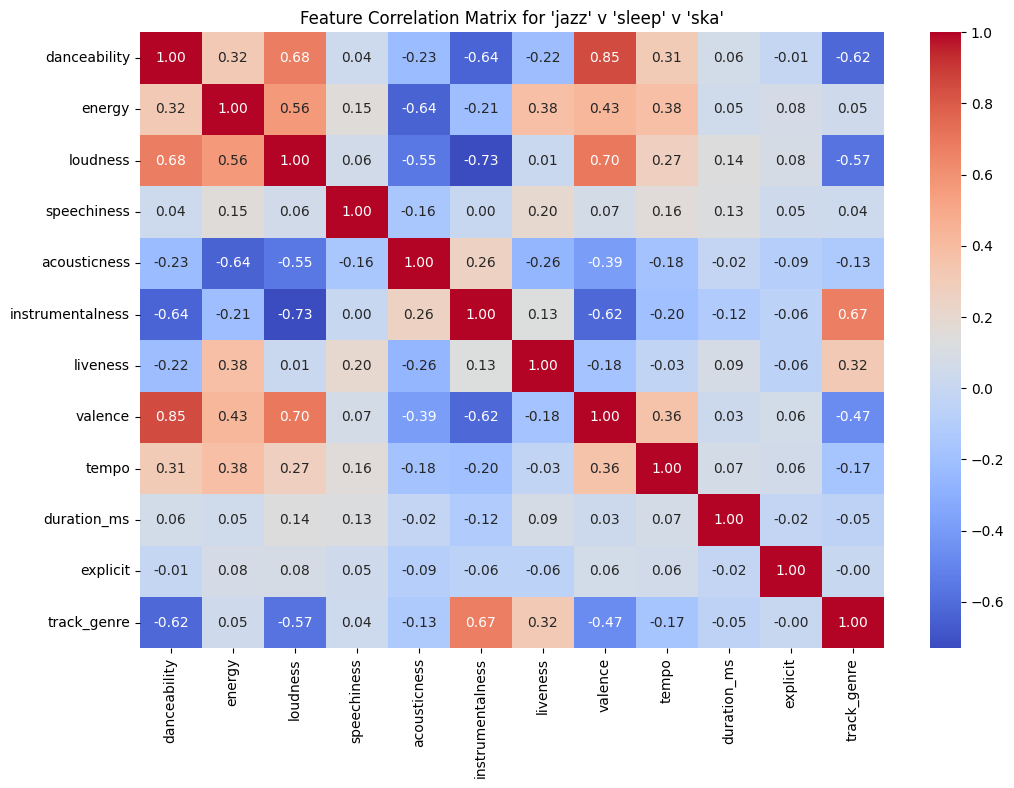

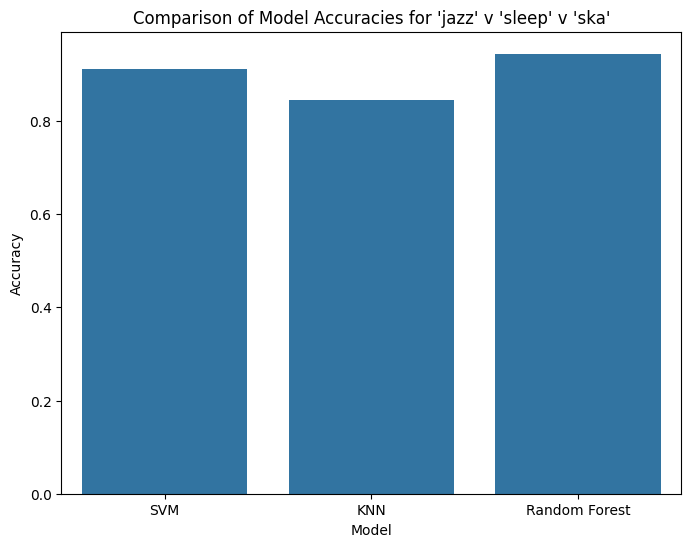

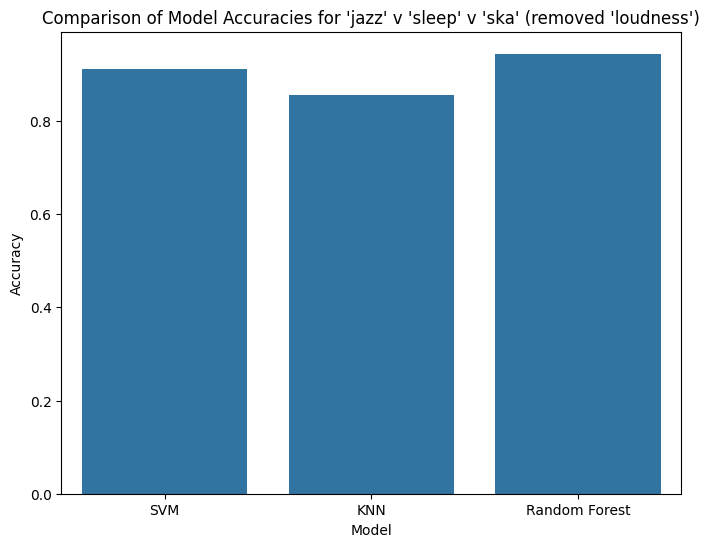

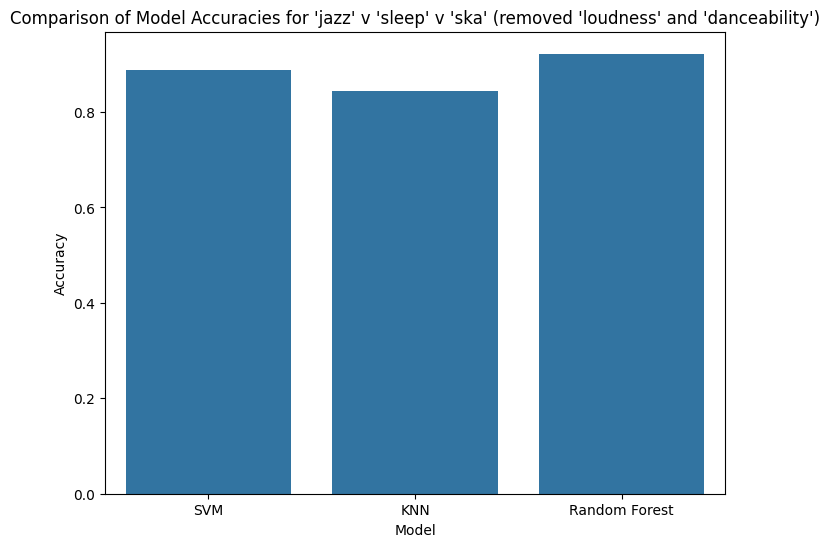

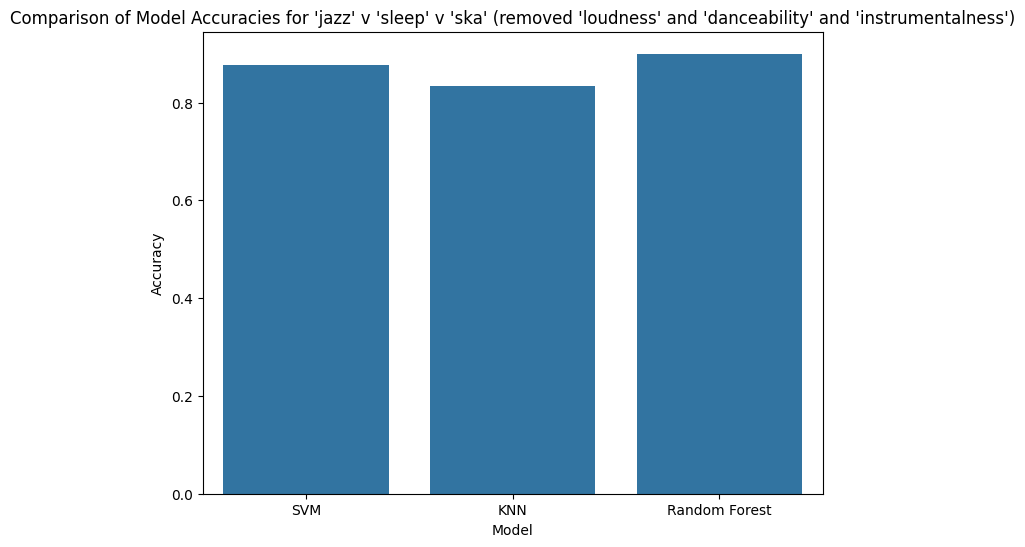

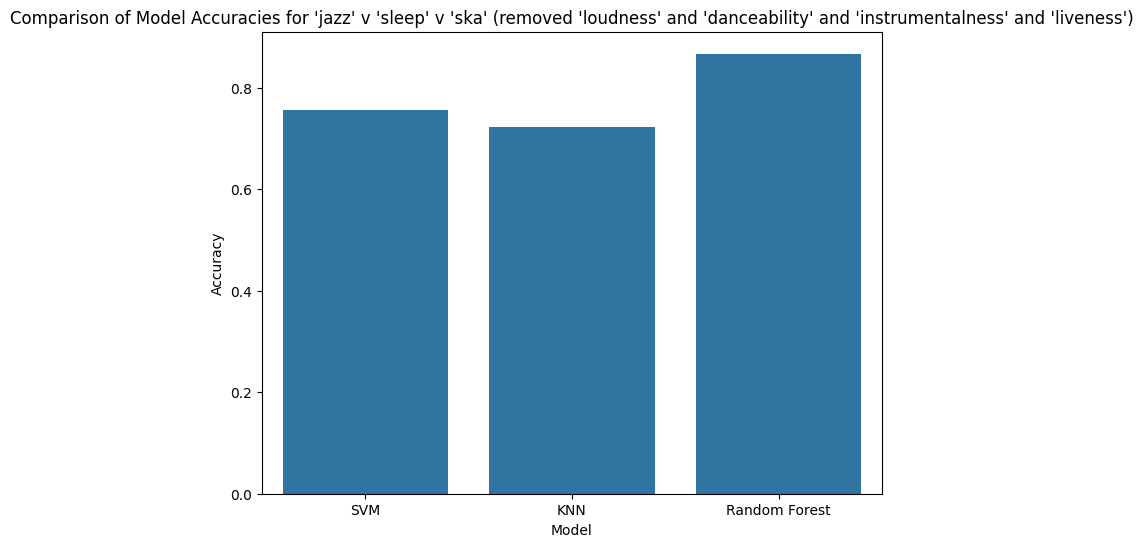

In [1013]:
#Observations of MULTICLASS EXPERIMENT, PART 1:  Three Genres and No Removed Features:
#SVM Accuracy:  0.91111; KNN Accuracy: 0.84444; Random Forest Accuracy: 0.94444


In [1014]:
#Observations of MULTICLASS EXPERIMENT, PART 2:  Two Genres and One Removed Feature:
#SVM Accuracy:  0.91111; KNN Accuracy: 0.85556; Random Forest Accuracy: 0.94444

In [1015]:
#Observations of MULTICLASS EXPERIMENT, PART 3:  Two Genres and Two Removed Features:
#SVM Accuracy:  0.88889; KNN Accuracy: 0.84444; Random Forest Accuracy: 0.92222

In [1016]:
#Observations of MULTICLASS EXPERIMENT, PART 4:  Two Genres and Three Removed Features:
#SVM Accuracy:  0.87778; KNN Accuracy: 0.83333; Random Forest Accuracy: 0.9

In [1017]:
#Observations of MULTICLASS EXPERIMENT, PART 5:  Two Genres and Four Removed Features:
#SVM Accuracy:  0.87778; KNN Accuracy: 0.83333; Random Forest Accuracy: 0.9

(2) For the three-genre multiclass choice of 'jazz' v. 'sleep' v. 'ska,' all classification methods of SVM, KNN, and Random Forest yielded accuracies of more than 80 percent.  After the three-feature-removal choice of 'loudness', 'danceability,' 'instrumentalness', and 'liveness,' the highest method accuracy was Random Forest's 91.11%, followed by SVM's 86.67% and KNN's 82.22%.  After Part 5, the Random Forest Method was the only method whose accuracy was greater than 90%.  In fact, THE RANDOM FOREST METHOD was the BEST (MOST ACCURATE) METHOD for ALL 5 PARTS OF THIS MULTICLASS EXPERIMENT.